# Visualisation of EEG Engagement Index

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [39]:
nParts = 12
nConds = 2
nChans = 16
nPowers = 6

EEG_baseline_control = loadmat('../EEG-baseline-control.mat')
EEG_baseline_exp = loadmat('../EEG-baseline-treatment.mat')
EEG_model_control = loadmat('../EEG-model-control.mat')
EEG_model_exp = loadmat('../EEG-model-treatment.mat')

EEG_baseline_control = EEG_baseline_control['EEG_baseline_control']
EEG_baseline_exp = EEG_baseline_exp['EEG_baseline_exp']
EEG_model_control = EEG_model_control['EEG_model_control']
EEG_model_exp = EEG_model_exp['EEG_model_exp']

print(EEG_baseline_control.shape)
print(EEG_baseline_exp.shape)
print(EEG_model_control.shape)
print(EEG_model_exp.shape)

EEG_control = np.zeros((nParts, nConds, nChans, 1))
EEG_exp = np.zeros((nParts, nConds, nChans, 1))

(12, 2, 16, 6)
(12, 2, 16, 6)
(12, 2, 16, 6)
(12, 2, 16, 6)


In [40]:
for iPart in range(nParts):
    control_part_all_zero = np.all(EEG_baseline_control[iPart]) == 0
    exp_part_all_zero = np.all(EEG_baseline_exp[iPart]) == 0

    if not control_part_all_zero:
        for iCond in range(nConds):
            for iChan in range(nChans):
                EEG_control[iPart, iCond, iChan, :] = EEG_model_control[iPart, iCond, iChan, nPowers-1] - EEG_baseline_control[iPart, iCond, iChan, nPowers-1]
    if not exp_part_all_zero:
        for iCond in range(nConds):
            for iChan in range(nChans):
                EEG_exp[iPart, iCond, iChan, :] = EEG_model_exp[iPart, iCond, iChan, nPowers-1] - EEG_baseline_exp[iPart, iCond, iChan, nPowers-1]

In [41]:
EEG_control_mean = np.mean(EEG_control)
EEG_exp_mean = np.mean(EEG_exp)
print(EEG_control_mean)
print(EEG_exp_mean)

0.003552113917937305
0.008041641282609455


<BarContainer object of 2 artists>

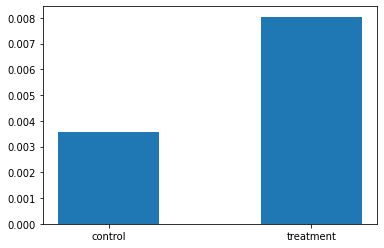

In [42]:
plt.bar(x = (2,3), height = [EEG_control_mean, EEG_exp_mean],
    width = 0.5,
    tick_label = ["control", "treatment"])